In [1]:
import os
import io
import sys
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import pydotplus

sns.set(style="darkgrid")

sys.path.append('..')

from PIL import Image as PIL_Image
from sklearn.externals.six import StringIO  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree
from IPython.display import Image as IPython_Image

from utils.plots import plot_confusion_matrix

random_state = 42

## Datensatz laden

In [2]:
df = pd.read_csv('../datasets/faulty-steel-plates.csv')

## Übersicht über den Datensatz

In [3]:
df.head(n=5)

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


## Aufteilung in Trainings- und Test Daten

In [4]:
X = df.drop(['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'], axis=1)
y = df.loc[:, 'Other_Faults']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=random_state)

In [5]:
print('Größe von X_train: {}'.format(X_train.shape))
print('Größe von y_train: {}'.format(y_train.shape))
print()
print('Größe von X_test: {}'.format(X_test.shape))
print('Größe von y_test: {}'.format(y_test.shape))

Größe von X_train: (1552, 27)
Größe von y_train: (1552,)

Größe von X_test: (389, 27)
Größe von y_test: (389,)


## Klassifikation mit einem Entscheidungsbaum

In [6]:
clf = tree.DecisionTreeClassifier(random_state=random_state)
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))

Accuracy: 76.09%


In [7]:
# os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

# dot_data = StringIO()

# tree.export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=X_train.columns, class_names=['Bekannter Fehler', 'Unbekannter Fehler'])

# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# IPython_Image(graph.create_png())

# image = PIL_Image.open(io.BytesIO(graph.create_png()))
# image.save('../images/faulty-steel-plates-no-pp-decision-tree.png')

### Entstandener Entscheidungsbaum

![Entscheidungsbaum](../images/faulty-steel-plates-no-pp-decision-tree.png)

### Wahrheitsmatrix (Confusion Matrix)

Confusion Matrix ist eine Zusammenfassung der Vorhersageergebnisse zu einem Klassifizierungsproblem.
Die Anzahl korrekter und falscher Vorhersagen wird mit Zählwerten zusammengefasst und nach Klassen aufgeteilt. 
Dies ist der Schlüssel zur Darstellung.

Die Matrix zeigt die Art der Fehler in der Vorhersage des Klassifizierungsmodells.

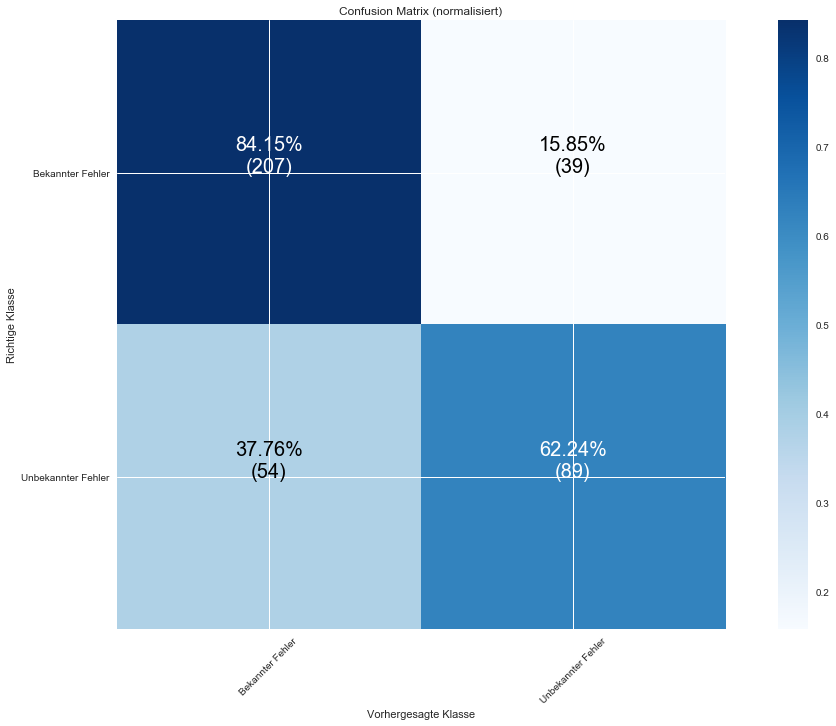

In [8]:
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

plt.figure(figsize=(15, 10))
plot_confusion_matrix(cnf_matrix, classes=['Bekannter Fehler', 'Unbekannter Fehler'], normalize=True,
                      title='Confusion Matrix')

plt.show()